#Implementation of Suppport Vector Regressor (SVR)

# Support vector Machine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise = 3)

In [4]:
x

array([[-0.25150209,  0.03766114],
       [-1.39791485, -0.31103031],
       [-1.10912384,  0.24329822],
       ...,
       [-0.83792174, -1.22985988],
       [ 1.50232101, -0.74424559],
       [ 0.75359134,  1.0534885 ]])

In [5]:
y

array([-3.83024319e+00, -6.99794172e+01, -1.59853856e+01,  1.00963953e+02,
       -7.36340451e+01,  6.18985633e+01,  6.65872871e+01, -4.94367314e+01,
       -7.45147171e+00,  5.14941193e-01, -1.38122081e+02, -1.20378803e+02,
        8.15750195e+00, -9.22773903e+01, -7.32948780e+01, -8.35204480e+01,
        5.17752946e+01,  1.78035797e+01, -1.36385486e+02, -2.17654882e+01,
       -1.05751195e+02, -9.56069053e+01,  7.23175824e+00,  6.74232288e+01,
        3.63339638e+01, -3.56740014e+01, -7.35431695e+00, -1.13485699e+02,
        1.48403899e+01,  1.07340179e+01,  1.05964078e+02,  1.14638892e+01,
       -1.58987507e+02,  6.03127994e+01, -4.82873724e+01, -2.67783149e+01,
       -5.65696103e+01, -1.03456739e+02,  7.34269574e+01,  1.52276837e+02,
       -1.19577912e+02,  1.45900274e+02,  6.27377793e+01,  1.69951739e+00,
       -7.77210821e+01,  8.25845782e+01, -3.84613271e+00, -4.22648417e+01,
       -4.89051413e+01, -8.00811357e+01,  1.19978055e+02,  7.68210806e+01,
        9.72683333e+01, -

In [6]:
pd.DataFrame(x)[0]

0     -0.251502
1     -1.397915
2     -1.109124
3      0.065331
4     -0.212027
         ...   
995    0.288737
996   -0.482836
997   -0.837922
998    1.502321
999    0.753591
Name: 0, Length: 1000, dtype: float64

In [14]:
pd.DataFrame(y)

,0
0,-3.830243
1,-69.979417
2,-15.985386
3,100.963953
4,-73.634045
...,...
995,64.046937
996,-50.682062
997,-124.700164
998,-4.405984


<Axes: xlabel='0', ylabel='1'>

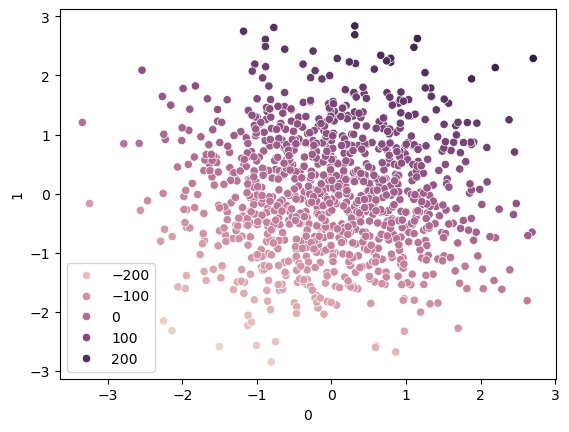

In [15]:
sns.scatterplot(x = pd.DataFrame(x)[0], y = pd.DataFrame(x)[1], hue = y)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [18]:
x_train.shape, x_test.shape

((700, 2), (300, 2))

In [19]:
y_train.shape, y_test.shape

((700,), (300,))

In [20]:
# model creation

from sklearn.svm import SVR
svr = SVR(kernel = "linear")
svr

SVR(kernel='linear')

In [21]:
# train the model
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [22]:
svr.coef_

array([[32.71750075, 76.06003535]])

In [23]:
y_pred = svr.predict(x_test)
y_pred

array([ 120.56851381, -149.01765443,   99.42815617, -242.92183869,
       -141.00197717,  -68.62590039,   45.59164835,  -71.4556388 ,
         40.38060369,  -77.90165001, -151.96451592,  -40.20901404,
        -35.05870664,   38.24962594,  -68.55922884,   32.40671532,
         43.53402523,   66.15118812,   37.22686397,  -38.5383962 ,
         10.47789094,  109.26456879,  -36.33972365,   38.87191064,
         19.75446189,    2.28693974,    7.28019506,   -9.48289344,
         74.88076082, -125.04325531,  103.53420632,   52.05493782,
         14.25318941,   75.1822271 ,  -29.94110504,   40.79522869,
        -64.61196708,   -6.81906292,  -77.94193142,  -56.83483933,
        -45.08178655,  -12.49247351,   17.2773098 ,  224.62738435,
       -124.94260326,  -70.08800017,   -2.89403861,  147.53692194,
        -10.25805499,   65.00941149,   75.42692917,  -46.59952741,
         17.73633153,  -25.00952511,   60.28358339,  -80.39863989,
          8.24807337,  119.02817564, -175.43463264,    3.19265

In [24]:
# evalution of model 

from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.9986931345801916

In [26]:
# Hyperparameter tunning with SVR

from sklearn.model_selection import GridSearchCV
params = {
    'C' : [1, 2, 3, 100, 50, 120, 100],
    'gamma' : [1, 0.1, 0.2, 0.001, 0.003],
    'kernel' : ['linear'],
    'epsilon' : [0.01, 0.1, 0.2, 0.3]
}

grid = GridSearchCV(SVR(), param_grid = params, cv = 5, verbose = 3)

In [27]:
grid

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 100, 50, 120, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [28]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV 1/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.2, kern

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 100, 50, 120, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [30]:
grid.best_params_

{'C': 100, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [31]:
grid.best_score_

np.float64(0.9988250176065062)

In [33]:
final_model = grid.best_estimator_

In [35]:
y_pred = final_model.predict(x_test)

In [38]:
r2_score(y_test,y_pred)

0.9987009703644183